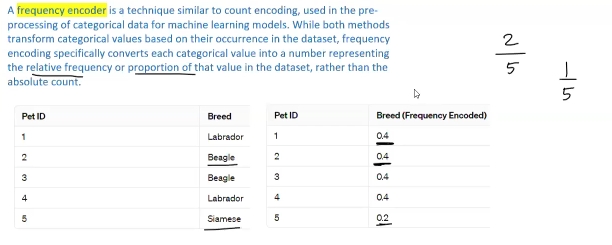

In [1]:
# dataset generation
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
data = {
    'Age': np.random.randint(20, 60, size=100).astype(float),  # Random ages between 20 and 60
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana'], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG'], size=100),
    'Package': np.random.rand(100) * 100  # Random package values for demonstration
}

# Introducing missing values in 'Age' column (5%)
np.random.seed(0)  # For reproducibility
missing_indices = np.random.choice(data['Age'].shape[0], replace=False, size=int(data['Age'].shape[0] * 0.05))
data['Age'][missing_indices] = np.nan

df = pd.DataFrame(data)

df.head()

,Age,State,Education,Package
0,38.0,Karnataka,PG,14.553808
1,45.0,Karnataka,High School,32.856554
2,NaN,Tamil Nadu,UG,51.874863
3,54.0,Tamil Nadu,High School,91.852960
4,44.0,Delhi,PG,5.508364


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Package']), df['Package'], test_size=0.2, random_state=42)

In [3]:
X_train.head()

,Age,State,Education
55,NaN,Tamil Nadu,PG
88,59.0,Tamil Nadu,High School
26,NaN,Maharashtra,UG
42,32.0,Karnataka,UG
69,44.0,Maharashtra,PG


In [4]:
X_train['State'].value_counts()

State
Karnataka      18
Tamil Nadu     17
Delhi          17
Maharashtra    15
Telangana      13
Name: count, dtype: int64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import CountEncoder
import pandas as pd
import sklearn

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(normalize=True), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])

sklearn.set_config(transform_output="pandas",)

In [16]:
preprocessor.fit_transform(X_train).round(2)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,40.21,0.21,1.0
88,59.00,0.21,0.0
26,40.21,0.19,2.0
42,32.00,0.22,2.0
69,44.00,0.19,1.0
...,...,...,...
60,40.00,0.21,0.0
71,44.00,0.22,1.0
14,53.00,0.16,2.0
92,51.00,0.21,2.0
